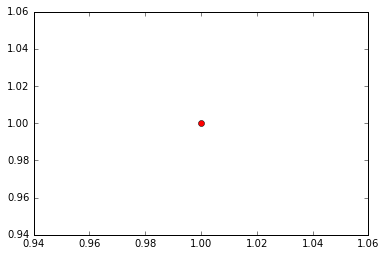

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(1,1,'ro')

In [2]:
import GPflow
import numpy as np
import tensorflow as tf
import AssignGPGibbsSingleLoop
import BranchingTree as bt
np.set_printoptions(precision=4) # precision to print numpy array
import branch_kernParamGPflow as bk
import time
import assigngp_dense 

[ 0.      0.0526  0.1053  0.1579  0.2105  0.2632  0.3158  0.3684  0.4211
  0.4737  0.5263  0.5789  0.6316  0.6842  0.7368  0.7895  0.8421  0.8947
  0.9474  1.    ]
[10 11 12 13 14 15 16 17 18 19]
[10 12 14 16 18]
[11 13 15 17 19]


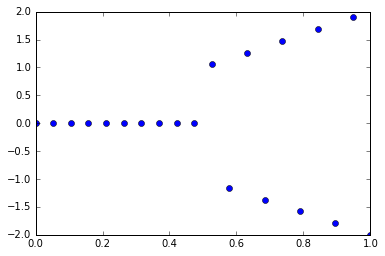

In [5]:
seed = 43

np.random.seed(seed=seed) # easy peasy reproducibeasy
tf.set_random_seed(seed)

N = 20
t = np.linspace(0,1,N)
print(t)
Bv = 0.5
Y = np.zeros( (N,1) )
idx = np.nonzero(t > 0.5)[0]
idxA = idx[::2]
idxB = idx[1::2]
print (idx)
print (idxA)
print (idxB)
Y[idxA,0] = 2*t[idxA]
Y[idxB,0] = -2*t[idxB]

plt.plot(t,Y,'ob')

In [7]:
# Initialise model
# kernel
Bvalue = np.ones((1,1)) * 0.5 
print(Bvalue)

tree = bt.BinaryBranchingTree(0,1,fDebug=False)
tree.add(None,1,Bvalue) 
(fm, _) = tree.GetFunctionBranchTensor()

print(fm)

Kbranch = bk.BranchKernelParam(GPflow.kernels.Matern32(1), fm, BvInitial=Bvalue) + GPflow.kernels.White(1)
varianceLik = .001
Kbranch.white.variance = varianceLik # controls the discontinuity magnitude, the gap at the branching point
Kbranch.branchkernelparam.kern.lengthscales = 5
Kbranch.branchkernelparam.kern.variance = 1
Kbranch.branchkernelparam.Bv = Bvalue
Kbranch.branchkernelparam.Bv.fixed = True


m = AssignGPGibbsSingleLoop.AssignGPGibbsFast(t, Y, Kbranch)
m.likelihood.variance = 1
m.kern.branchkernelparam.Bv = Bvalue
m.CompileAssignmentProbability(fDebug=True,fMAP=True) 

print(m.XExpanded.shape)
print(len(m.indices))
#print XSampleGeneral

mV = assigngp_dense.AssignGP(t, m.XExpanded, Y, Kbranch)
mV.likelihood.variance = varianceLik
mV._compile() # creates objective function

randomAssignment = AssignGPGibbsSingleLoop.GetRandomInit(t,Bvalue,m.indices)
print(randomAssignment)
print (m.XExpanded[randomAssignment,:])

[[ 0.5]]
[[[ nan]
  [  1.]
  [  1.]]

 [[  1.]
  [ nan]
  [  1.]]

 [[  1.]
  [  1.]
  [ nan]]]


InvalidArgumentError: You must feed a value for placeholder tensor 'Bv' with dtype double and shape [1,1]
	 [[Node: Bv = Placeholder[dtype=DT_DOUBLE, shape=[1,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op 'Bv', defined at:
  File "/Users/mqbssaby/anaconda/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/mqbssaby/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-29417a036513>", line 18, in <module>
    Kbranch.branchkernelparam.Bv.fixed = True
  File "/Users/mqbssaby/pythonlibs/GPflow/GPflow/param.py", line 289, in __setattr__
    name=self.name)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1274, in placeholder
    name=name)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1522, in _placeholder
    name=name)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2310, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/mqbssaby/anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()


# MAP inference

In [5]:
numMCMCsteps = 10
#bestAssignment = list(randomAssignment)
#chainState = np.ones(10)
(chainState, bestAssignment,assignmentHistory,condProbs)= m.InferenceGibbsMAP(fDebug=True,fReturnAssignmentHistory=True\
                                                            ,maximumNumberOfSteps=numMCMCsteps,startingAssignment=randomAssignment)


Performing MAP inference with B=[ 0.5]
Processing point 10 with inds [30, 31, 32]
Processing point 11 with inds [33, 34, 35]
Processing point 12 with inds [36, 37, 38]
Processing point 13 with inds [39, 40, 41]
Processing point 14 with inds [42, 43, 44]
Processing point 15 with inds [45, 46, 47]
Processing point 16 with inds [48, 49, 50]
Processing point 17 with inds [51, 52, 53]
Processing point 18 with inds [54, 55, 56]
Processing point 19 with inds [57, 58, 59]
Iteration 0/10, lik=-31.545
Processing point 10 with inds [30, 31, 32]
Processing point 11 with inds [33, 34, 35]
Processing point 12 with inds [36, 37, 38]
Processing point 13 with inds [39, 40, 41]
Processing point 14 with inds [42, 43, 44]
Processing point 15 with inds [45, 46, 47]
Processing point 16 with inds [48, 49, 50]
Processing point 17 with inds [51, 52, 53]
Processing point 18 with inds [54, 55, 56]
Processing point 19 with inds [57, 58, 59]
Iteration 1/10, lik=-31.545
Processing point 10 with inds [30, 31, 32]
Pr

In [6]:
print 'MAP Assignment probabilities'
for c in condProbs:
    e = np.exp(c) # convert log like to like
    print e / np.sum(e)

MAP Assignment probabilities
[ 0.5009  0.4991]
[ 0.4969  0.5031]
[ 0.5073  0.4927]
[ 0.4866  0.5134]
[ 0.5253  0.4747]
[ 0.4698  0.5302]
[ 0.5379  0.4621]
[ 0.433  0.567]
[ 0.5783  0.4217]
[ 0.4143  0.5857]
[ 0.5032  0.4968]
[ 0.4899  0.5101]
[ 0.5187  0.4813]
[ 0.4729  0.5271]
[ 0.5377  0.4623]
[ 0.4532  0.5468]
[ 0.5583  0.4417]
[ 0.433  0.567]
[ 0.5783  0.4217]
[ 0.4143  0.5857]
[ 0.5032  0.4968]
[ 0.4899  0.5101]
[ 0.5187  0.4813]
[ 0.4729  0.5271]
[ 0.5377  0.4623]
[ 0.4532  0.5468]
[ 0.5583  0.4417]
[ 0.433  0.567]
[ 0.5783  0.4217]
[ 0.4143  0.5857]


In [7]:
# Check correct classification of points
allocationOfPoints = m.XExpanded[bestAssignment,:]
print 'MAP Allocation of points'
print allocationOfPoints
print 'MAP Allocation of points function A'
print allocationOfPoints[idxA,:]
print 'MAP Allocation of points function B'
print allocationOfPoints[idxB,:]
assert np.unique(allocationOfPoints[idxA,1]) == 2
assert np.unique(allocationOfPoints[idxB,1]) == 3

MAP Allocation of points
[[ 0.      1.    ]
 [ 0.0526  1.    ]
 [ 0.1053  1.    ]
 [ 0.1579  1.    ]
 [ 0.2105  1.    ]
 [ 0.2632  1.    ]
 [ 0.3158  1.    ]
 [ 0.3684  1.    ]
 [ 0.4211  1.    ]
 [ 0.4737  1.    ]
 [ 0.5263  2.    ]
 [ 0.5789  3.    ]
 [ 0.6316  2.    ]
 [ 0.6842  3.    ]
 [ 0.7368  2.    ]
 [ 0.7895  3.    ]
 [ 0.8421  2.    ]
 [ 0.8947  3.    ]
 [ 0.9474  2.    ]
 [ 1.      3.    ]]
MAP Allocation of points function A
[[ 0.5263  2.    ]
 [ 0.6316  2.    ]
 [ 0.7368  2.    ]
 [ 0.8421  2.    ]
 [ 0.9474  2.    ]]
MAP Allocation of points function B
[[ 0.5789  3.    ]
 [ 0.6842  3.    ]
 [ 0.7895  3.    ]
 [ 0.8947  3.    ]
 [ 1.      3.    ]]


In [8]:
# Convert MAP assignments to Phi probabilities : soft or hard assignment
# Soft assignment uses the Gibbs conditional probabilities at convergence
# Hard assignment uses the MAP assignment setting Phi to 1 for that entry
#
fSoftAssignment = True

if(fSoftAssignment):
    print m.indices
    Bv = m.kern.branchkernelparam.Bv._array.flatten()
    N = len(m.indices)
    print len(condProbs)
    MAPAssignmentProbabilities = []
    for c in condProbs:
        e = np.exp(c) # convert log like to like
        MAPAssignmentProbabilities.append(e / np.sum(e))

    phiInitial = np.zeros((N,3*N))
    phiInitial_invSoftmax =  -9.* np.ones((N,3*N)) # large neg number makes exact zeros, make smaller for added jitter 
    ct = 1
    for i, n in reversed(list(enumerate(bestAssignment))):
        #print '----------->' + str(i) + ','+str(n)
        if(m.t[i] > Bv):
            # after branch point - we look at assignment probabilities
            ind = m.indices[i][1:] # single branching point special case - just take second and third indics
            mCond = MAPAssignmentProbabilities[-ct] # backwards
            for p,indxi in enumerate(ind):
                # print str(i) + ' ' + str(indxi) + '=' + str(mCond[p])
                phiInitial[i,indxi] = mCond[p] # 19. * mCond[p] - 9.
                phiInitial_invSoftmax[i,indxi] = np.log(mCond[p])  
            ct += 1
        else:
            # before branch point - we know with certainty
            phiInitial[i,n] = 1
            phiInitial_invSoftmax[i,n] = 1 # 10
            #print str(i) + ' ' + str(n) + '=' + str(mCond[p])

    #print 'X'
    #print m.t
    #print 'MAP conditionals'
    #print MAPAssignmentProbabilities[20:]
    #print 'PhiInitial'
    #print phiInitial
else:
    # hard assignment
    # Set state for assignments
    phiInitial = np.zeros((N,3*N))
    phiInitial_invSoftmax =  np.zeros((N,3*N)) # large neg number makes exact zeros, make smaller for added jitter 
    for i,n in enumerate(bestAssignment):
        phiInitial[i,n] = 1
        phiInitial_invSoftmax[i,n] = 10

###########################################

# Try to understand Phi matrix
mV.logPhi= phiInitial_invSoftmax

# Phi = mV.GetPhi() does the same
#parameterVector = tf.placeholder("float64") # Needed by GPflow
with mV.tf_mode():
    Phi_s = tf.nn.softmax(mV.logPhi)
Phi = mV._session.run(Phi_s, feed_dict={mV._free_vars:mV.get_free_state()})

# Print first and last entry in the Phi matrix and it's initial value - that should match
print 'Phi0=' 
print Phi[0,:]
print  'PhiIWant0'
print phiInitial[0,:]
#print mV.logPhi._array[19]

print 'Phi=' 
print Phi[19,:]
print  'PhiIWant'
print phiInitial[19,:]
print  'phiInitial_invSoftmax'
print phiInitial_invSoftmax[19,:]
#print mV.logPhi._array[19]

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14], [15, 16, 17], [18, 19, 20], [21, 22, 23], [24, 25, 26], [27, 28, 29], [30, 31, 32], [33, 34, 35], [36, 37, 38], [39, 40, 41], [42, 43, 44], [45, 46, 47], [48, 49, 50], [51, 52, 53], [54, 55, 56], [57, 58, 59]]
30
Phi0=
[  9.9733e-01   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05
   4.5279e-05   4.5279e-05   4.5279e-05   4.5279e-05   4.527

# Variational inference

In [9]:
# VB code
# Variational bound - no recomputing
print mV
print 'Variational kernel branch value ' + str(mV.kern.branchkernelparam.Bv.get_free_state())
# Could also optimize!
VBbound = mV._objective(mV.get_free_state())[0] # this is -log of bound
print VBbound

model.likelihood.\u001bvariance\u001b transform:+ve prior:None
[ 0.001]
model.kern.white.\u001bvariance\u001b transform:+ve prior:None
[ 0.001]
model.kern.branchkernelparam.\u001bBv\u001b transform:(none) prior:None [FIXED]
[[ 0.5]]
model.kern.branchkernelparam.kern.\u001bvariance\u001b transform:+ve prior:None
[ 1.]
model.kern.branchkernelparam.kern.\u001blengthscales\u001b transform:+ve prior:None
[ 5.]
model.\u001blogPhi\u001b transform:(none) prior:None
[[ 1.     -9.     -9.     ..., -9.     -9.     -9.    ]
 [-9.     -9.     -9.     ..., -9.     -9.     -9.    ]
 [-9.     -9.     -9.     ..., -9.     -9.     -9.    ]
 ..., 
 [-9.     -9.     -9.     ..., -9.     -9.     -9.    ]
 [-9.     -9.     -9.     ..., -9.     -9.     -9.    ]
 [-9.     -9.     -9.     ..., -9.     -0.8811 -0.535 ]]

Variational kernel branch value []
[ 7815.1278]


In [10]:
## Prior to optimisation
mV

Name,values,prior,constriant
model.likelihood.variance,[ 0.001],None,+ve
model.kern.white.variance,[ 0.001],None,+ve
model.kern.branchkernelparam.Bv,[[ 0.5]],None,[FIXED]
model.kern.branchkernelparam.kern.variance,[ 1.],None,+ve
model.kern.branchkernelparam.kern.lengthscales,[ 5.],None,+ve
model.logPhi,"[[ 1. -9. -9. ..., -9. -9. -9. ] [-9. -9. -9. ..., -9. -9. -9. ] [-9. -9. -9. ..., -9. -9. -9. ] ..., [-9. -9. -9. ..., -9. -9. -9. ] [-9. -9. -9. ..., -9. -9. -9. ] [-9. -9. -9. ..., -9. -0.8811 -0.535 ]]",None,(none)


compiling tensorflow function...
done
Phi
[[  9.9733e-01   4.5279e-05   4.5279e-05 ...,   4.5279e-05   4.5279e-05
    4.5279e-05]
 [  4.5279e-05   4.5279e-05   4.5279e-05 ...,   4.5279e-05   4.5279e-05
    4.5279e-05]
 [  4.5279e-05   4.5279e-05   4.5279e-05 ...,   4.5279e-05   4.5279e-05
    4.5279e-05]
 ..., 
 [  1.2253e-04   1.2253e-04   1.2253e-04 ...,   1.2253e-04   1.2253e-04
    1.2253e-04]
 [  1.2253e-04   1.2253e-04   1.2253e-04 ...,   1.2253e-04   1.2253e-04
    1.2253e-04]
 [  1.2253e-04   1.2253e-04   1.2253e-04 ...,   1.2253e-04   4.1139e-01
    5.8150e-01]]


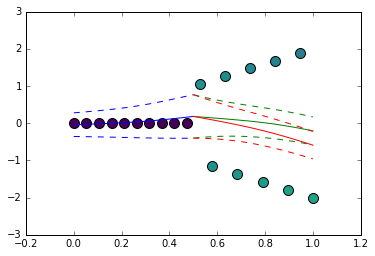

In [11]:
def plotPosterior(pt, Bv):
    mV._compile()
    l = np.min(pt)
    u = np.max(pt)

    for f in range(1, 4):
        if(f==1):
            ttest = np.linspace(l, Bv, 100)[:,None] # root
        else:
            ttest = np.linspace(Bv, u, 100)[:,None]
        Xtest = np.hstack((ttest, ttest*0+f))
        mu, var = mV.predict_f(Xtest)
        assert np.all(np.isfinite(mu)), 'All elements should be finite but are ' + str(mu)
        assert np.all(np.isfinite(var)), 'All elements should be finite but are ' + str(var)
        mean, = plt.plot(ttest, mu)
        col = mean.get_color()
        plt.plot(ttest, mu + 2*np.sqrt(var), '--', color=col)
        plt.plot(ttest, mu - 2*np.sqrt(var), '--', color=col)
    
    Phi = mV.GetPhi()   
    for p, ind, y in zip(Phi, m.indices, mV.Y):
        ps = p[ind]
        i = ind[np.argmax(ps)]
        plt.scatter(mV.X[i,0], y, 100, ps[2], vmin=0, vmax=1, cmap=plt.cm.viridis)
    print 'Phi'
    print Phi

plotPosterior(t,Bv)

        
#        df=tree.GetFunctionDomains()
#del mV._predict_f_graph
#mV._compile()
#plt.figure(figsize=(16,12))
#for b in range(1, df.shape[0]+1):
#    ttest = np.linspace(df[b-1][0], df[b-1][1], 100)[:,None]
#    Xtest = np.hstack((ttest, ttest*0+b))
    
#    mu, var = mV.predict_f(Xtest)
#    assert np.all(np.isfinite(mu)), 'All elements should be finite but are ' + str(mu)
#    assert np.all(np.isfinite(var)), 'All elements should be finite but are ' + str(var)
    
#    mean, = plt.plot(ttest, mu)
#    col = mean.get_color()
#    plt.plot(ttest, mu + 2*np.sqrt(var), '--', color=col)
#    plt.plot(ttest, mu - 2*np.sqrt(var), '--', color=col)

#for p, ind, y in zip(Phi, m.indices, mV.Y):
#    ps = p[ind]
#    i = ind[np.argmax(ps)]
#    plt.scatter(mV.X[i,0], y, 100, ps[2], vmin=0, vmax=1, cmap=plt.cm.viridis)

In [12]:
phiCalculated = mV.InitialisePhi(m.indices, bestAssignment, Bv, condProbs, fSoftAssignment = True)

In [13]:
mV

Name,values,prior,constriant
model.likelihood.variance,[ 0.001],None,+ve
model.kern.white.variance,[ 0.001],None,+ve
model.kern.branchkernelparam.Bv,[[ 0.5]],None,[FIXED]
model.kern.branchkernelparam.kern.variance,[ 1.],None,+ve
model.kern.branchkernelparam.kern.lengthscales,[ 5.],None,+ve
model.logPhi,"[[ 1.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] ..., [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -6.9078e+00 -1.0005e-03]]",None,(none)


In [14]:
print phiCalculated
print phiInitial

[[ 1.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.001  0.999]]
[[ 1.      0.      0.     ...,  0.      0.      0.    ]
 [ 0.      0.      0.     ...,  0.      0.      0.    ]
 [ 0.      0.      0.     ...,  0.      0.      0.    ]
 ..., 
 [ 0.      0.      0.     ...,  0.      0.      0.    ]
 [ 0.      0.      0.     ...,  0.      0.      0.    ]
 [ 0.      0.      0.     ...,  0.      0.4143  0.5857]]


In [15]:
# After optimisation
mV

Name,values,prior,constriant
model.likelihood.variance,[ 0.001],None,+ve
model.kern.white.variance,[ 0.001],None,+ve
model.kern.branchkernelparam.Bv,[[ 0.5]],None,[FIXED]
model.kern.branchkernelparam.kern.variance,[ 1.],None,+ve
model.kern.branchkernelparam.kern.lengthscales,[ 5.],None,+ve
model.logPhi,"[[ 1.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] ..., [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -9.0000e+00 -9.0000e+00] [ -9.0000e+00 -9.0000e+00 -9.0000e+00 ..., -9.0000e+00 -6.9078e+00 -1.0005e-03]]",None,(none)


compiling tensorflow function...
done
Phi
[[  9.9733e-01   4.5279e-05   4.5279e-05 ...,   4.5279e-05   4.5279e-05
    4.5279e-05]
 [  4.5279e-05   4.5279e-05   4.5279e-05 ...,   4.5279e-05   4.5279e-05
    4.5279e-05]
 [  4.5279e-05   4.5279e-05   4.5279e-05 ...,   4.5279e-05   4.5279e-05
    4.5279e-05]
 ..., 
 [  1.2253e-04   1.2253e-04   1.2253e-04 ...,   1.2253e-04   1.2253e-04
    1.2253e-04]
 [  1.2253e-04   1.2253e-04   1.2253e-04 ...,   1.2253e-04   1.2253e-04
    1.2253e-04]
 [  1.2253e-04   1.2253e-04   1.2253e-04 ...,   1.2253e-04   9.9289e-04
    9.9190e-01]]


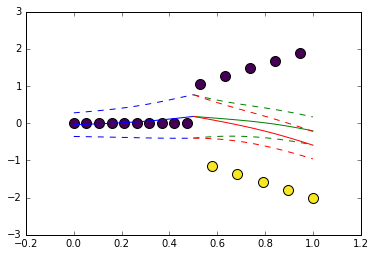

In [16]:
plotPosterior(t,Bv)

In [26]:
# test saving and restoring model
# Initialise model
# kernel
str = 'Exp1'
np.save(str + 'VBmodel',mV.get_free_state())

KbranchNew = bk.BranchKernelParam(GPflow.kernels.Matern32(1), fm, BvInitial=Bvalue) + GPflow.kernels.White(1)
KbranchNew.branchkernelparam.Bv.fixed = True
mNew = AssignGPGibbsSingleLoop.AssignGPGibbsFast(t, Y, KbranchNew)
mVNew = assigngp_dense.AssignGP(t, mNew.XExpanded, Y, KbranchNew)
#mVNew._compile()
print 'mV'
print mV
print 'mVNew'
mVNew.set_state( np.load(str + 'VBmodel.npy'))
print mVNew
# have to restore state prior to compilation



mV
model.likelihood.\u001bvariance\u001b transform:+ve prior:None
[ 0.001]
model.kern.white.\u001bvariance\u001b transform:+ve prior:None
[ 0.001]
model.kern.branchkernelparam.\u001bBv\u001b transform:(none) prior:None [FIXED]
[[ 4.9932]]
model.kern.branchkernelparam.kern.\u001bvariance\u001b transform:+ve prior:None
[ 1.]
model.kern.branchkernelparam.kern.\u001blengthscales\u001b transform:+ve prior:None
[ 5.]
model.\u001blogPhi\u001b transform:(none) prior:None
[[  1.0000e+00  -9.0000e+00  -9.0000e+00 ...,  -9.0000e+00  -9.0000e+00
   -9.0000e+00]
 [ -9.0000e+00  -9.0000e+00  -9.0000e+00 ...,  -9.0000e+00  -9.0000e+00
   -9.0000e+00]
 [ -9.0000e+00  -9.0000e+00  -9.0000e+00 ...,  -9.0000e+00  -9.0000e+00
   -9.0000e+00]
 ..., 
 [ -9.0000e+00  -9.0000e+00  -9.0000e+00 ...,  -9.0000e+00  -9.0000e+00
   -9.0000e+00]
 [ -9.0000e+00  -9.0000e+00  -9.0000e+00 ...,  -9.0000e+00  -9.0000e+00
   -9.0000e+00]
 [ -9.0000e+00  -9.0000e+00  -9.0000e+00 ...,  -9.0000e+00  -6.9078e+00
   -1.0005e-0

In [27]:
assert np.allclose( mV.get_free_state(), mVNew.get_free_state() )
# note this will not copy and check the fixed parameters such as 


True